# Polarization's anisotropies of the CMB

## In this code I compute the Cls of the polarization map

In [23]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp 
import pymaster as nmt
import astropy as ast

In [24]:
from astropy.io import fits

In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))
# make sure the version and path is what you expect

Using CAMB 1.3.5 installed at /home/akozameh/miniconda3/envs/CMB/lib/python3.10/site-packages/camb


In [13]:
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

In [14]:
#calculate results for these parameters
results = camb.get_results(pars)

In [15]:
#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


In [16]:
#In this jupyter notebook it shows the power spectra of a polarization map
#The pseudo-Cl estimator of the angular power spectrum of a spin-2 field and a spin-1 field.
# read map
#pol_map_1=hp.read_map('/home/akozameh/cmblss/data/HFI_CompMap_Foregrounds-commander-143_R3.00.fits', field=0)
pol_map_2=hp.read_map('/home/akozameh/cmblss/data/HFI_CompMap_Foregrounds-commander-143_R3.00.fits')

In [28]:
# Remove the dipole
cmb_map_after_removal=hp.pixelfunc.remove_dipole(pol_map_2)
hdu = fits.PrimaryHDU(cmb_map_after_removal)
hdu.header['COMMENT'] = 'This FITS file contains the CMB map after dipole removal'
# Specify the filename for the FITS file
fits_filename = 'cmb_map_after_dipole_removal.fits'



In [18]:
#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
print(totCL.shape)
#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).

(2551, 4)


In [29]:
ls = np.arange(totCL.shape[0])

In [10]:
# Resolution up to 16
#map_pol_1=hp.pixelfunc.ud_grade(pol_map, 16)
#map_pol_2=hp.pixelfunc.ud_grade(pol_map, 16)

In [30]:
# Read mask and apodize it on a scale of ~1deg
mask= nmt.mask_apodization(hp.read_map('/home/akozameh/cmblss/data/COM_Mask_Likelihood-polarization-143-hm2_2048_R3.00.fits'),
                            1., apotype="Smooth")
#mask=hp.pixelfunc.ud_grade(mask, 16)
#hp.mollview(mask, title='Apodized mask')



In [33]:
cmb_map = hp.read_map('/home/akozameh/cmblss/code/cmblss-main/cmb_map_after_dipole_removal.fits')

ValueError: Available hdu in [0-1]

In [32]:
# Read healpix maps and initialize a spin-0 and spin-2 field
f_0 = nmt.NmtField(mask, [hp.read_map('/home/akozameh/cmblss/code/cmblss-main/cmb_map_after_dipole_removal.fits',field=0)])
hp.mollview(mask)

ValueError: Available hdu in [0-1]

In [14]:
f_2=nmt.NmtField(mask, pol_map_2)

In [15]:
# Initialize binning scheme with 4 ells per bandpower
b = nmt.NmtBin.from_nside_linear(64, 4)

In [16]:
# Compute MASTER estimator
# spin-0 x spin-0
cl_00 = nmt.compute_full_master(f_0, f_0, b)
# spin-0 x spin-2
cl_02 = nmt.compute_full_master(f_0, f_2, b)
# spin-2 x spin-2
cl_22 = nmt.compute_full_master(f_2, f_2, b)

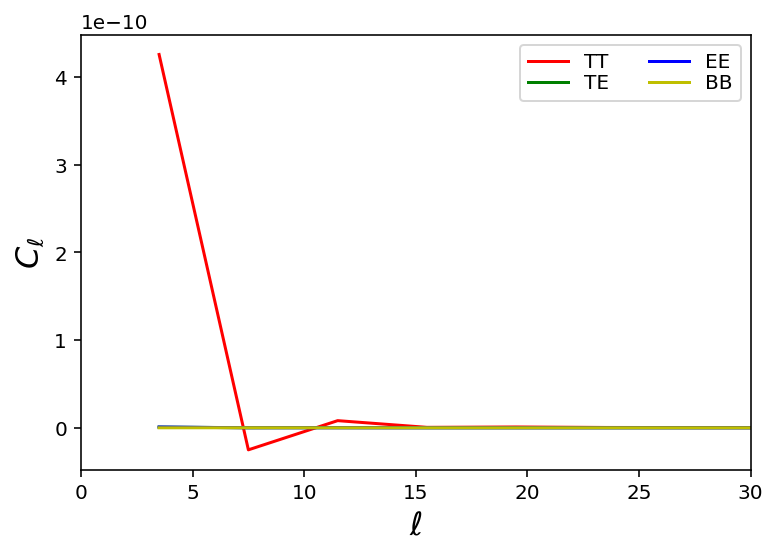

In [17]:
# Plot results
l = b.get_effective_ells()
plt.plot(l, cl_00[0], 'r-', label='TT')
plt.plot(l, np.fabs(cl_02[0]), 'g-', label='TE')
plt.plot(l, cl_22[0], 'b-', label='EE')
plt.plot(l, cl_22[3], 'y-', label='BB')
plt.xlim(0,30)
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='upper right', ncol=2, labelspacing=0.1)
plt.show()

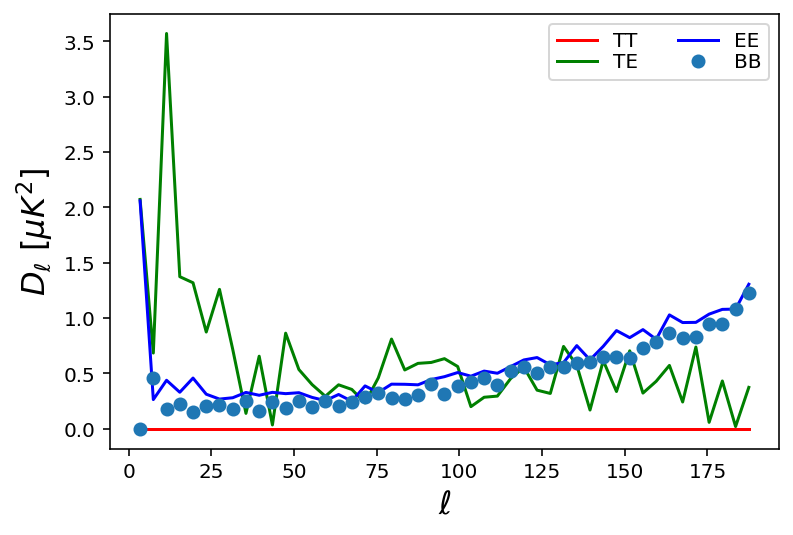

In [18]:
plt.plot(l, cl_00[0], 'r-', label='TT')
plt.plot(l, np.fabs(cl_02[0])*l*(l+1)*(1e12)/2/np.pi, 'g-', label='TE')
plt.plot(l, cl_22[0]*l*(l+1)*(1e12)/2/np.pi, 'b-', label='EE')
plt.plot(l, cl_22[3]*l*(l+1)*(1e12)/2/np.pi, 'o', label='BB')
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$D_\\ell~[\mu K^2]$', fontsize=16)
#plt.ylim(0,30)
plt.legend(loc='upper right', ncol=2, labelspacing=0.1)
plt.show()

In [19]:
!head  COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum-theory_R3.01.txt

     L    TT             TE             EE             BB             PP
     2   0.101673E+04   0.261753E+01   0.308827E-01   0.181847E-05   0.501352E-07
     3   0.963727E+03   0.293806E+01   0.396903E-01   0.363743E-05   0.609943E-07
     4   0.912608E+03   0.275866E+01   0.344962E-01   0.606345E-05   0.702592E-07
     5   0.874477E+03   0.235185E+01   0.230941E-01   0.909717E-05   0.782921E-07
     6   0.848509E+03   0.189605E+01   0.129512E-01   0.127394E-04   0.853020E-07
     7   0.832082E+03   0.149063E+01   0.700022E-02   0.169910E-04   0.914734E-07
     8   0.822295E+03   0.117940E+01   0.450136E-02   0.218531E-04   0.969341E-07
     9   0.817803E+03   0.967988E+00   0.360317E-02   0.273268E-04   0.101794E-06
    10   0.817174E+03   0.848454E+00   0.307459E-02   0.334135E-04   0.106122E-06


In [20]:
# Read the data from Planck colaboration.
data_Planck=np.genfromtxt('COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum-theory_R3.01.txt')

In [21]:
data_Planck.shape

(2508, 6)

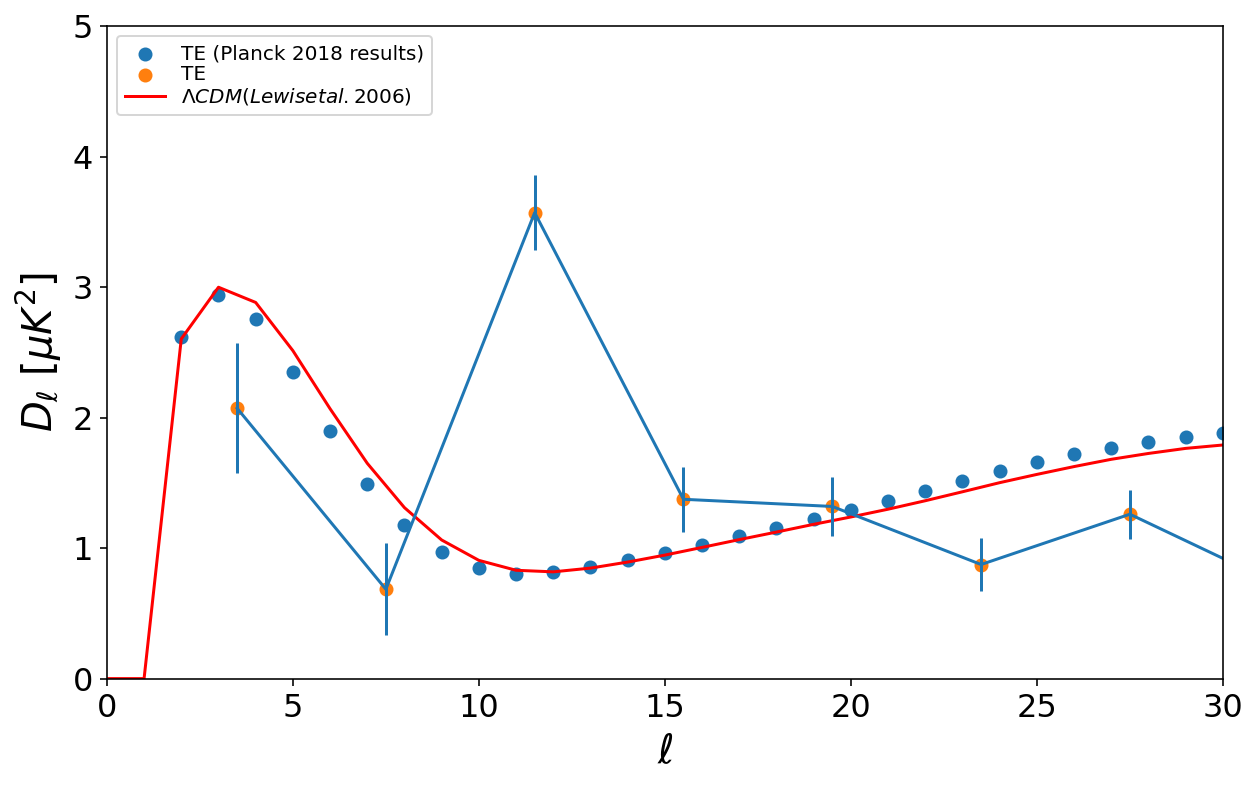

In [22]:

plt.figure(figsize=(10,6))
plt.scatter(data_Planck[:,0], data_Planck[:,2],label = "TE (Planck 2018 results)")
plt.scatter(l, np.fabs(cl_02[0])*l*(l+1)*(1e12)/2/np.pi,  label='TE')
plt.plot(ls,unlensedCL[:,3], color='r', label='$\Lambda CDM(Lewis et al. 2006)$')
# Error bar, cosmic variance
plt.errorbar(l,np.fabs(cl_02[0])*l*(l+1)*(1e12)/2/np.pi, yerr=np.sqrt(2/(2*l+1)))


plt.xlabel('$\\ell$', fontsize=20)
plt.ylabel('$D_\\ell~[\mu K^2]$', fontsize=20)
plt.xlim(0,30)
plt.ylim(0,5)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='upper left', ncol=1, labelspacing=0.1)
plt.show()

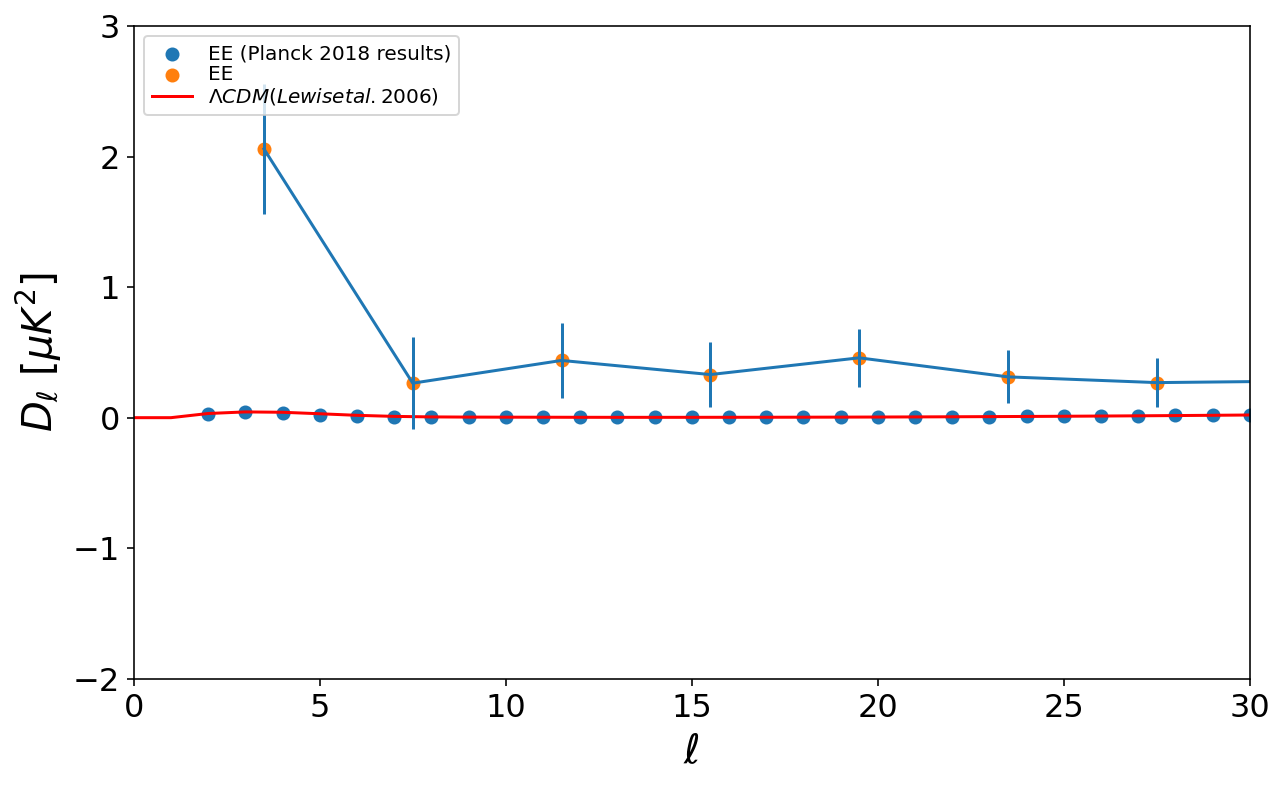

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(data_Planck[:,0], data_Planck[:,3],label = "EE (Planck 2018 results)")
plt.scatter(l, cl_22[0]*l*(l+1)*(1e12)/2/np.pi, label='EE')
plt.plot(ls,totCL[:,1], color='r', label='$\Lambda CDM (Lewis et al. 2006)$')

# Error bar
plt.errorbar(l,np.fabs(cl_22[0])*l*(l+1)*(1e12)/2/np.pi, yerr=np.sqrt(2/(2*l+1)))

#plt.loglog()
plt.xlim(0,30)
plt.ylim(-2,3)
plt.xlabel('$\\ell$', fontsize=20)
plt.ylabel('$D_\\ell~[\mu K^2]$', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='upper left', ncol=1, labelspacing=0.1)
plt.show()

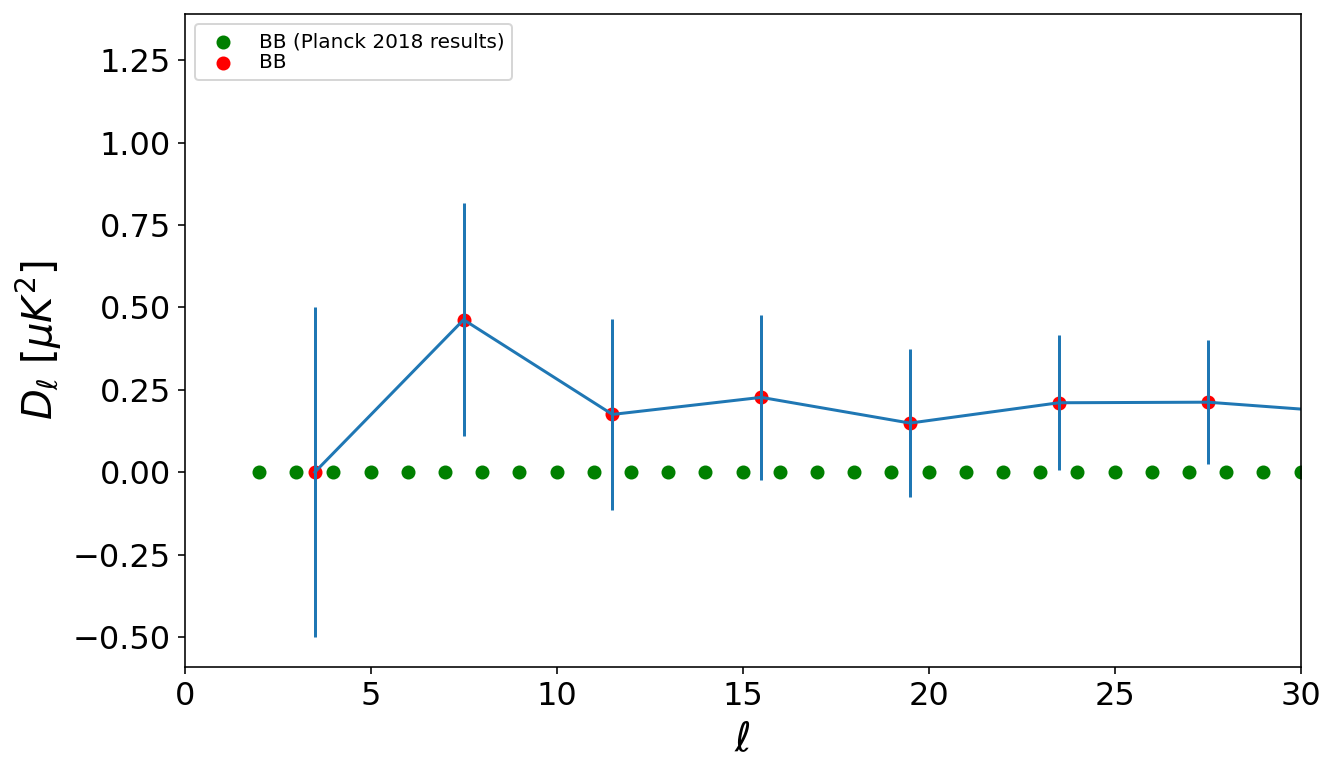

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(data_Planck[:,0], data_Planck[:,4],color='g',label = "BB (Planck 2018 results)")
plt.scatter(l, cl_22[3]*l*(l+1)*(1e12)/2/np.pi, color='r', label='BB')

#Errorbar 
plt.errorbar(l,np.fabs(cl_22[3])*l*(l+1)*(1e12)/2/np.pi, yerr=np.sqrt(2/(2*l+1)))
#plt.loglog()
plt.xlim(0,30)
plt.xlabel('$\\ell$', fontsize=20)
plt.ylabel('$D_\\ell~[\mu K^2]$', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='upper left', ncol=1, labelspacing=0.1)
plt.show()

In [34]:
print(type(data_Planck[:,2]))

<class 'numpy.ndarray'>
